<h2 align=center>Analyze Worldwide Box Office Revenue with Plotly and Python</h2>
<img src="revenue.png">

This project is second in a series focused on data visualization with Plotly and Seaborn. You can find the first [Project: Analyze Box Office Data with Seaborn and Python](https://www.coursera.org/learn/analyze-data-seaborn-python/) on Coursera.

### (Part 1) Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import xgboost as xgb
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### (Part 1) Data Loading and Exploration

In [2]:
train = pd.read_csv('train-Copy1.csv')
test = pd.read_csv('test-Copy1.csv')

In [3]:
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

### (Part 1) Visualizing the Target Distribution

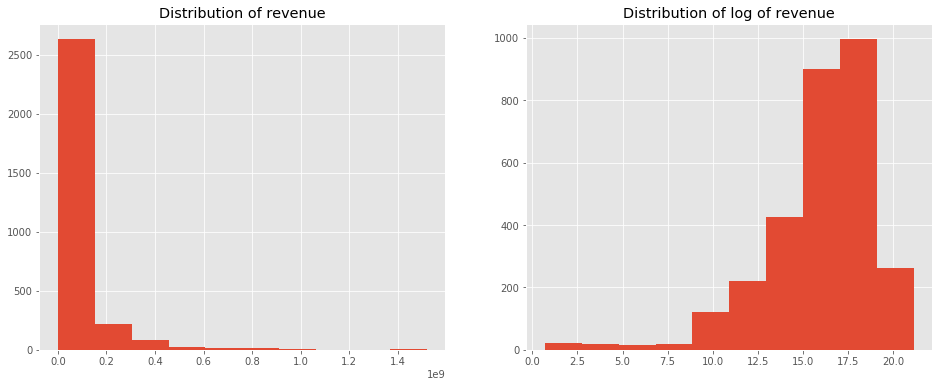

In [4]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']));
plt.title('Distribution of log of revenue');

In [5]:
train['log_revenue'] = np.log1p(train['revenue'])

### (Part 1) Relationship between Film Revenue and Budget

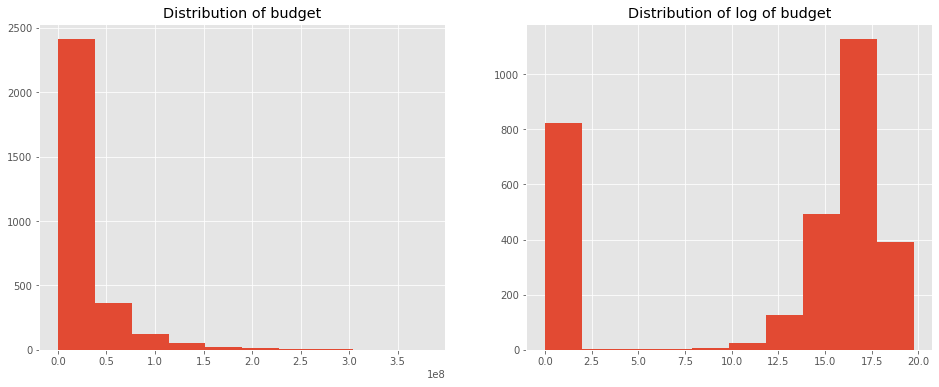

In [6]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['budget']));
plt.title('Distribution of log of budget');

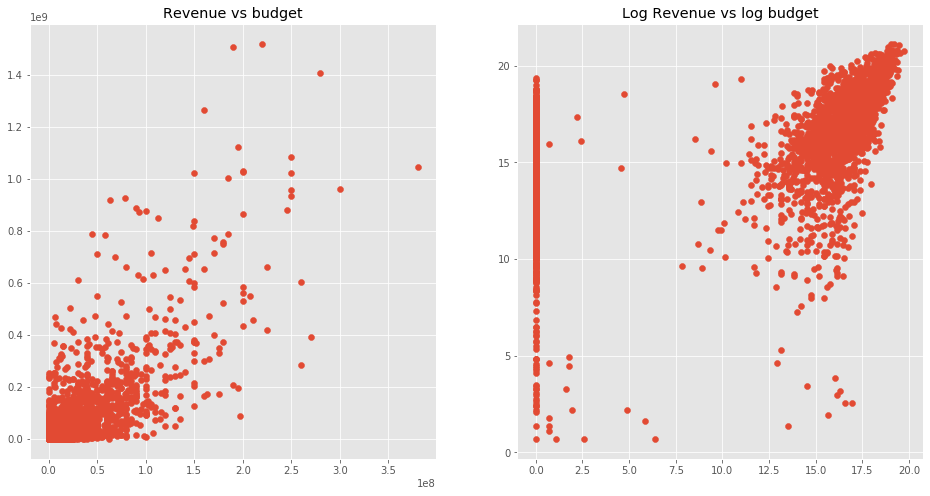

In [7]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['budget'], train['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget']), train['log_revenue'])
plt.title('Log Revenue vs log budget');

In [8]:
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

### (Part 1) Does having an Official Homepage Affect Revenue?

In [9]:
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                 4
http://www.lordoftherings.net/                    2
http://www.thehobbit.com/                         2
https://twitter.com/Stonewall_Movie               1
http://www.coffeeandcigarettesmovie.com/          1
http://lamiglioreoffertailfilm.it                 1
http://www.intheheartoftheseamovie.com/           1
http://www.patriotsdayfilm.com/                   1
http://movies.uip.de/aboutaboy/                   1
http://theastronautfarmermovie.warnerbros.com/    1
Name: homepage, dtype: int64

In [10]:
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

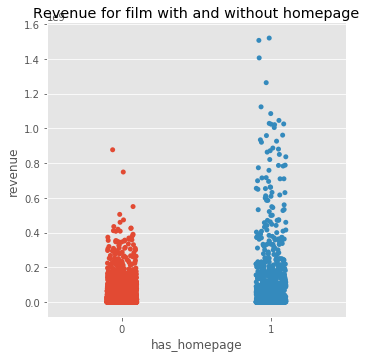

In [11]:
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for film with and without homepage');

### (Part 1) Distribution of Languages in Film

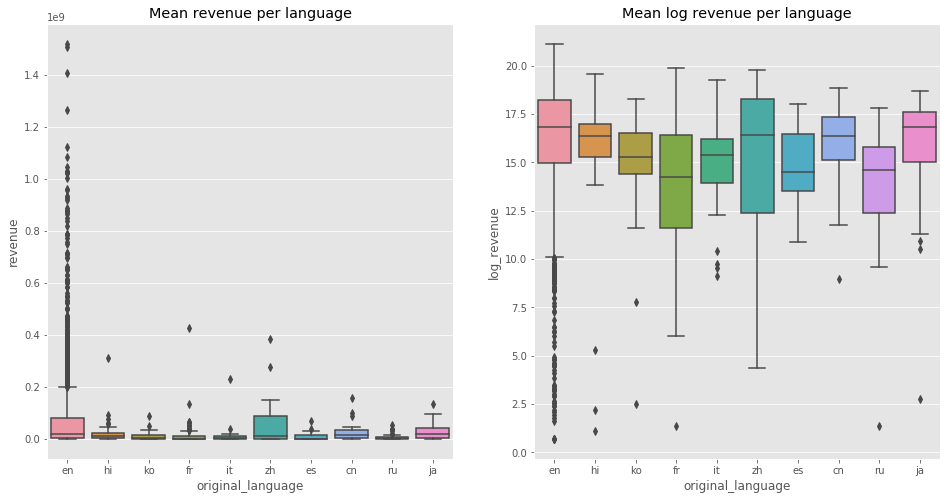

In [12]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language');

### (Part 1) Frequent Words in Film Titles and Discriptions

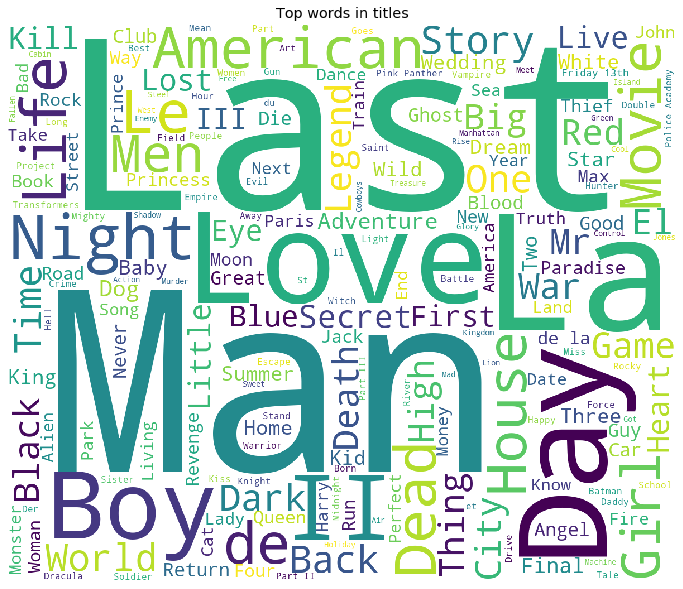

In [13]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in titles')
plt.axis("off")
plt.show()

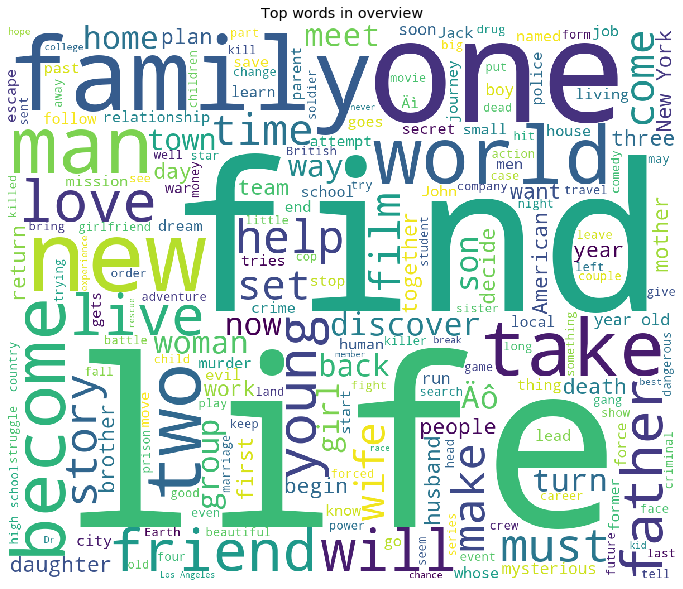

In [14]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

## a vectorizer used to prepare features for a classifier, or a list of feature names.
### Term Frequency(TF) The term frequency indicates the frequency of each of the words present in the document or dataset. 
### Inverse Document Frequency(IDF). The second part is — inverse document frequency. IDF actually tells us how important the word is to the document

### (Part 1) Do Film Descriptions Impact Revenue?

In [15]:
import eli5

vectorizer = TfidfVectorizer(
    #Sublinear tf scaling addresses the problem that 20 occurrences of a word is probably not 20 times more
#important than 1 occurrence
            sublinear_tf=True,
    #word character......
            analyzer='word',
    # r to ignore the \
    #\w	One word character{1,}	1 or more
            token_pattern=r'\w{1,}',
    #unigram or bigram .....
            ngram_range=(1, 2),
    #When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
    #This value is also called cut-off in the literature.
            min_df=5)

overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, train['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=50, feature_filter=lambda x: x != '<BIAS>')

Using TensorFlow backend.


Weight?,Feature
+13.074,to
+10.131,bombing
+9.981,the
+9.777,complications
+9.243,äì
+9.191,and get
+8.850,at it
+8.765,california
+8.749,that this
+8.669,others


In [16]:
print('Target value:', train['log_revenue'][1000])
eli5.show_prediction(linreg, doc=train['overview'].values[1000], vec=vectorizer)

Target value: 16.44583954907521


### Task 2: Analyzing Movie Release Dates
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [17]:
test.loc[test['release_date'].isnull()==False,'release_date'].head()

0    7/14/07
1    5/19/58
2    5/23/97
3     9/4/10
4    2/11/05
Name: release_date, dtype: object

### Task 3: Preprocessing Features

### Create Function to fix date

In [18]:
def fix_date(x):
    year=x.split('/')[2]
    if int(year) <= 20:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19'+year

In [19]:
test.loc[test['release_date'].isnull()==True]

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer

In [20]:
test.loc[test['release_date'].isnull() == True , 'release_date']='05/01/00'

##### DataFrame.apply(self, func, axis=0, raw=False, result_type=None, args=(), **kwds)
Apply a function along an axis of the DataFrame.

## Apply Function on the Data_Frame

In [21]:
train['release_date']=train['release_date'].apply(lambda x:fix_date(x))
test['release_date']=test['release_date'].apply(lambda x:fix_date(x))

### Task 4: Creating Features Based on Release Date

In [22]:
train['release_date']=pd.to_datetime(train['release_date'])
test['release_date']=pd.to_datetime(test['release_date'])

## Creating features For Date_time

#### getattr()
This method returns the value of the named attribute of an object. If not found, it returns the default value provided to the function.

### pandas.Series.dt
Series.dt()[source]
Accessor object for datetimelike properties of the Series values.
Examples
s.dt.hour
s.dt.second
s.dt.quarter
Returns a Series indexed like the original Series. Raises TypeError if the Series does not contain datetimelike values.

In [23]:
def process_date (df):
    date_parts =['year','weekday','month','weekofyear','day','quarter']
    for part in date_parts:
        part_col = 'release_date' + '_' + part
        df[part_col] = getattr(df['release_date'].dt,part).astype(int)
    return df

In [24]:
train = process_date(train)
test = process_date(test)

### Task 5: Using Plotly to Visualize the Number of Films Per Year

In [25]:
d1=train['release_date_year'].value_counts().sort_index()
d2=test['release_date_year'].value_counts().sort_index()

In [26]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [27]:
# Pass Data to the x_axis(years) And Y_axis(Counts)
data =[go.Scatter(x=d1.index,y=d1.values,name='train'),
       go.Scatter(x=d2.index,y=d2.values,name='test')]
# Define the Layout for the line Chart
layout = go.Layout(dict(title = 'Number of Films Per Year',
                       xaxis = dict(title='Year'),
                        yaxis = dict(title='Count'),
                       ),legend = dict(orientation='v'))
#call the plot
py.iplot(dict(data=data,layout=layout))

### Task 6: Number of Films and Revenue Per Year

# Line_Graph With Two Y_Axis

In [28]:
d1=train['release_date_year'].value_counts().sort_index()
d2=train.groupby(['release_date_year'])['revenue'].sum()

In [29]:
# Pass Data to the x_axis(Film_years), Y_axis(Film_Counts) And Y_axis2 (Sum_of_revenues)
data =[go.Scatter(x=d1.index,y=d1.values,name='Film_Count_Per_Year'),
       go.Scatter(x=d2.index,y=d2.values,name='Sum_Of_Revenues_Per_Year',yaxis='y2')]
# Define the Layout for the line Chart
layout = go.Layout(dict(title = 'Numver of Films and total Revenue Per Year',
                       xaxis = dict(title='Year'),
                        yaxis = dict(title='Count'),
                        yaxis2=dict(title='Total revenue',overlaying='y',side='right'),
                       ),legend = dict(orientation='v'))
#call the plot
py.iplot(dict(data=data,layout=layout))

## Mean of Revenue

In [30]:
d1=train['release_date_year'].value_counts().sort_index()
d2=train.groupby(['release_date_year'])['revenue'].mean()
# Pass Data to the x_axis(Film_years), Y_axis(Film_Counts) And Y_axis2 (Sum_of_revenues)
data =[go.Scatter(x=d1.index,y=d1.values,name='Film_Count_Per_Year'),
       go.Scatter(x=d2.index,y=d2.values,name='Mean_Of_Revenues_Per_Year',yaxis='y2')]
# Define the Layout for the line Chart
layout = go.Layout(dict(title = 'Number of Films and Average Revenue Per Year',
                       xaxis = dict(title='Year'),
                        yaxis = dict(title='Count'),
                        yaxis2=dict(title='Total revenue',overlaying='y',side='right'),
                       ),legend = dict(orientation='v'))
#call the plot
py.iplot(dict(data=data,layout=layout))

### Task 7: Do Release Days Impact Revenue?

Text(0.5, 1, 'Revenue Of different days the week')

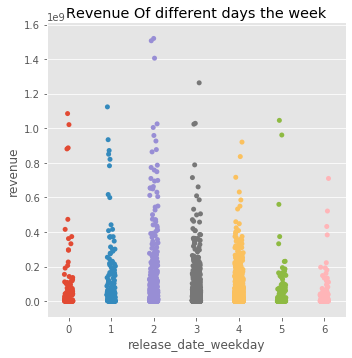

In [31]:
sns.catplot(x='release_date_weekday',y='revenue',data=train)
plt.title('Revenue Of different days the week')

### Task 8: Relationship between Runtime and Revenue

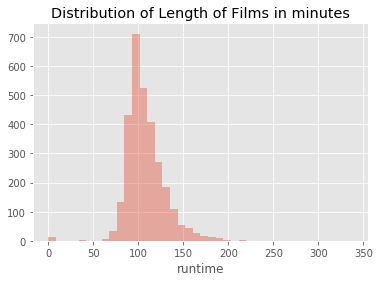

In [32]:
sns.distplot(train['runtime'].fillna(0),bins=40,kde=False);
plt.title("Distribution of Length of Films in minutes");

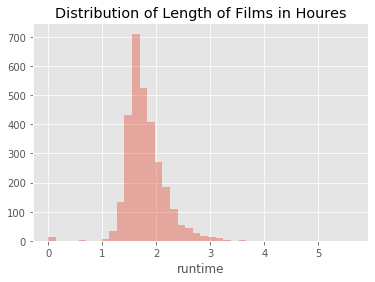

In [33]:
sns.distplot(train['runtime'].fillna(0)/60,bins=40,kde=False);
plt.title("Distribution of Length of Films in Houres");

Text(0.5, 1.0, 'Runtime Vs Revenue')

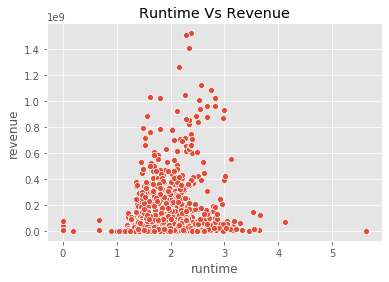

In [34]:
sns.scatterplot(x=train['runtime'].fillna(0)/60,y=train['revenue'])
plt.title('Runtime Vs Revenue')

Text(0.5, 1.0, 'Runtime Vs Revenue')

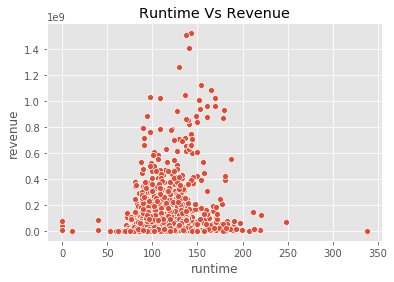

In [35]:
sns.scatterplot(x=train['runtime'].fillna(0),y=train['revenue'])
plt.title('Runtime Vs Revenue')

# feature Matrix


In [36]:
from sklearn import linear_model
train['budget'] = pd.to_numeric(train['budget'], errors='coerce')
train['runtime'] = pd.to_numeric(train['runtime'], errors='runtime')
train['release_date_weekday'] = pd.to_numeric(train['release_date_weekday'], errors='coerce')
train['revenue'] = pd.to_numeric(train['revenue'], errors='coerce')
test['budget'] = pd.to_numeric(test['budget'], errors='coerce')
test['runtime'] = pd.to_numeric(test['runtime'], errors='runtime')
test['release_date_weekday'] = pd.to_numeric(test['release_date_weekday'], errors='coerce')
#test['revenue'] = pd.to_numeric(test['revenue'], errors='coerce')

In [37]:
train.loc[train['runtime'].isnull() == True,'runtime'] = train['runtime'].mean()

In [38]:
train.loc[train['revenue'].isnull() == True]

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

In [57]:
test['revenue']=train['revenue'].loc[:100]

In [58]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['budget','runtime','release_date_weekday']])
y = np.asanyarray(train[['revenue']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 2.74008093e+00  2.26116496e+05 -5.60814214e+06]]


In [64]:
y_hat= regr.predict(test[['budget','runtime','release_date_weekday']])
x = np.asanyarray(test[['budget','runtime','release_date_weekday']])
y = np.asanyarray(test[['revenue']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 11074973009596376.00
Variance score: -36.29


In [61]:
test.loc[test['runtime'].isnull() == True,'runtime']=test['runtime'].mean()

In [62]:
test.loc[test['release_date_weekday'].isnull() == True]

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer

In [63]:
test.loc[test['revenue'].isnull()==True,'revenue']=test['revenue'].mean()